# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import gmaps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

import json
import requests
from random import uniform

from citipy import citipy
import time

#API keys
from api_keys2 import g_key, weather_key

# Configure gmaps
gmaps.configure(api_key = g_key)

## Generate Cities List

In [2]:
# Get list of random latitudes and longitudes
lat = np.random.uniform(-90,90,1500)
lng = np.random.uniform(-180,180,1500)

In [3]:
# Zip lat & lng into tupled list
coords = list(zip(lat,lng))
len(coords)

1500

In [4]:
# Convert random coordinates into list of cities + details
# for x in coords: 
#     location = geolocator.reverse(f'{x[0]},{x[1]}')
#     time.sleep(1)
# print(location.address)
cities = []
countries = []
comma = ","
for x in coords:
    city = citipy.nearest_city(x[0], x[1])
    cities.append(city.city_name)
    countries.append(city.country_code)

# Convert list to df
df = pd.DataFrame(list(zip(cities,countries)),columns=["City","Country"])
df.count()

City       1500
Country    1500
dtype: int64

In [5]:
# Clean df of repeat cities
clean_df = df.drop_duplicates(subset="City")
clean_df.count()

City       640
Country    640
dtype: int64

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
weather_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
cities_json = []
temps_json = []
humid_json = []
clouds_json = []
winds_json = []
lng_json = []
lat_json = []
countries_json = []
max_temp_json = []
city_count = 0

for index,row in clean_df.iterrows():
    city = row["City"]
    query_url = weather_url + "appid=" + weather_key + "&q=" + city + "&units=" + units 
    city_count += 1
    print(f"Processing results to Index {index}: ({city})")
    try:
        response = requests.get(query_url).json()
        time.sleep(1)
        temps_json.append(response["main"]["temp"])
        max_temp_json.append(response["main"]["temp_max"])
        cities_json.append(response["name"])
        countries_json.append(response["sys"]["country"])
        humid_json.append(response["main"]["humidity"])
        clouds_json.append(response["clouds"]["all"])
        winds_json.append(response["wind"]["speed"])
        lng_json.append(response["coord"]["lon"])
        lat_json.append(response["coord"]["lat"])
    
    except:
        print(f"{city} not found")
        pass

Processing results to Index 0: (saleaula)
saleaula not found
Processing results to Index 1: (illoqqortoormiut)
illoqqortoormiut not found
Processing results to Index 2: (bila tserkva)
Processing results to Index 3: (jian)
Processing results to Index 4: (east london)
Processing results to Index 5: (palabuhanratu)
palabuhanratu not found
Processing results to Index 6: (port hardy)
Processing results to Index 7: (yellowknife)
Processing results to Index 9: (tual)
Processing results to Index 10: (palmer)
Processing results to Index 11: (rikitea)
Processing results to Index 12: (castro)
Processing results to Index 13: (beringovskiy)
Processing results to Index 14: (mobaye)
Processing results to Index 15: (oistins)
Processing results to Index 16: (qidong)
Processing results to Index 17: (port macquarie)
Processing results to Index 18: (port elizabeth)
Processing results to Index 19: (petropavlovsk-kamchatskiy)
Processing results to Index 20: (hualmay)
Processing results to Index 21: (hidas)


In [7]:
### Convert Raw Data to DataFrame
# Display the DataFrame
pre_weather_df = pd.DataFrame(list(zip(cities_json,countries_json,temps_json,max_temp_json,humid_json,clouds_json,winds_json,lat_json,lng_json)),
                          columns=["City","Country","Temperature","Max Temp","Humidity %","Cloudiness %","Wind Speed (mph)","Latitude","Longitude"])
pre_weather_df

,City,Country,Temperature,Max Temp,Humidity %,Cloudiness %,Wind Speed (mph),Latitude,Longitude
0,Bila Tserkva,UA,61.29,61.29,77,99,10.85,49.8094,30.1121
1,Ji’an,CN,77.23,77.23,90,30,3.51,27.1172,114.9793
2,East London,ZA,51.21,51.21,66,45,21.14,-33.0153,27.9116
3,Port Hardy,CA,57.13,57.13,86,96,5.75,50.6996,-127.4199
4,Yellowknife,CA,71.29,71.29,59,84,8.39,62.4560,-114.3525
...,...,...,...,...,...,...,...,...,...
584,Kisangani,CD,75.00,75.00,60,71,0.96,0.5167,25.2000
585,Bariloche,AR,49.75,49.75,46,0,12.66,-41.1456,-71.3082
586,Aripuanã,BR,82.45,82.45,41,0,2.48,-9.1667,-60.6333
587,Codrington,AU,40.98,40.98,91,100,9.89,-38.2667,141.9667


In [8]:
# Purge data of duplicates
weather_df = pre_weather_df.drop_duplicates()
weather_df

,City,Country,Temperature,Max Temp,Humidity %,Cloudiness %,Wind Speed (mph),Latitude,Longitude
0,Bila Tserkva,UA,61.29,61.29,77,99,10.85,49.8094,30.1121
1,Ji’an,CN,77.23,77.23,90,30,3.51,27.1172,114.9793
2,East London,ZA,51.21,51.21,66,45,21.14,-33.0153,27.9116
3,Port Hardy,CA,57.13,57.13,86,96,5.75,50.6996,-127.4199
4,Yellowknife,CA,71.29,71.29,59,84,8.39,62.4560,-114.3525
...,...,...,...,...,...,...,...,...,...
584,Kisangani,CD,75.00,75.00,60,71,0.96,0.5167,25.2000
585,Bariloche,AR,49.75,49.75,46,0,12.66,-41.1456,-71.3082
586,Aripuanã,BR,82.45,82.45,41,0,2.48,-9.1667,-60.6333
587,Codrington,AU,40.98,40.98,91,100,9.89,-38.2667,141.9667


# json weather format
<!-- {"coord":
        {"lon":-50.0119,"lat":-24.7911},
 "weather":[{"id":801,"main":"Clouds","description":"few clouds","icon":"02n"}],
 "base":"stations",
 "main":
         {"temp":284.89,
        "feels_like":284.68,
        "temp_min":284.89,
        "temp_max":284.89,
        "pressure":1020,
        "humidity":98,
        "sea_level":1020,
        "grnd_level":906},
 "visibility":10000,
 "wind":
        {"speed":1.89,
        "deg":286,
        "gust":4.07},
 "clouds":{"all":22},
 "dt":1626566362,
 "sys":
       {"country":"BR",
       "sunrise":1626516191,
       "sunset":1626554930},
 "timezone":-10800,
 "id":3466704,
 "name":"Castro",
 "cod":200} -->

In [28]:
# Export the city data into a .csv.
weather_df.to_csv(r'../Outputs/WeatherPy_Data.csv', index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
# Get the indices of cities that have humidity over 100%.
humid_100 = weather_df.loc[weather_df["Humidity %"]>= 100,:]
humid_100.index

Int64Index([65, 299, 336, 409, 499, 526, 532], dtype='int64')

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
labels = humid_100.index
clean_city_data = weather_df.drop(index=labels,inplace=False)
clean_city_data

# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

,City,Country,Temperature,Max Temp,Humidity %,Cloudiness %,Wind Speed (mph),Latitude,Longitude
0,Bila Tserkva,UA,61.29,61.29,77,99,10.85,49.8094,30.1121
1,Ji’an,CN,77.23,77.23,90,30,3.51,27.1172,114.9793
2,East London,ZA,51.21,51.21,66,45,21.14,-33.0153,27.9116
3,Port Hardy,CA,57.13,57.13,86,96,5.75,50.6996,-127.4199
4,Yellowknife,CA,71.29,71.29,59,84,8.39,62.4560,-114.3525
...,...,...,...,...,...,...,...,...,...
584,Kisangani,CD,75.00,75.00,60,71,0.96,0.5167,25.2000
585,Bariloche,AR,49.75,49.75,46,0,12.66,-41.1456,-71.3082
586,Aripuanã,BR,82.45,82.45,41,0,2.48,-9.1667,-60.6333
587,Codrington,AU,40.98,40.98,91,100,9.89,-38.2667,141.9667


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

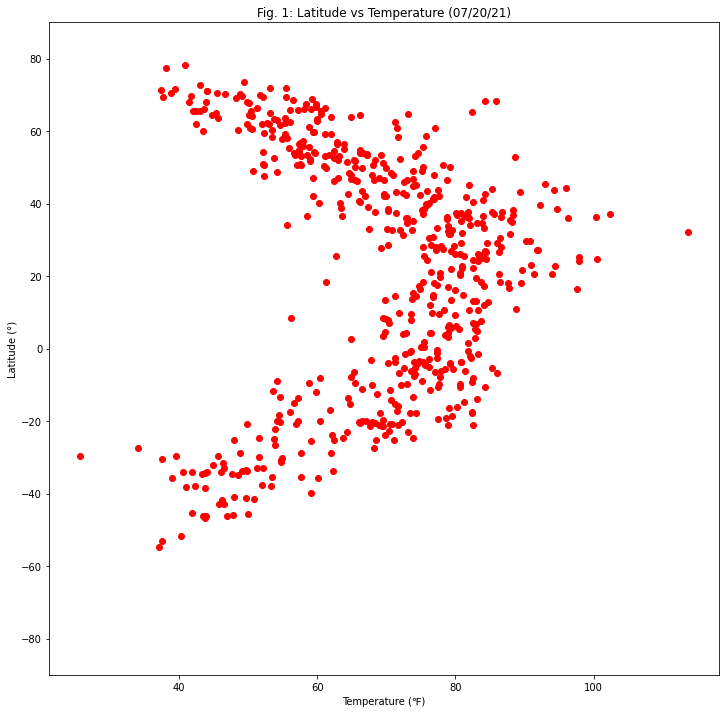

In [12]:
# Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
fig1 = plt.figure(figsize =(12, 12))

clean_city_temp = clean_city_data["Temperature"]
clean_city_temp

clean_city_lat = clean_city_data["Latitude"]
clean_city_lat

lat_temp_scatter =  plt.scatter(clean_city_temp, clean_city_lat, color="red")

plt.ylabel(u"Latitude (°)")
plt.ylim(-90,90)
plt.xlabel(u"Temperature (℉)")
plt.title("Fig. 1: Latitude vs Temperature (07/20/21)")
plt.show

# Save the plotted figures as .pngs
fig1 = lat_temp_scatter.get_figure()
fig1.savefig(r'../Outputs/WeatherPy_Fig1.png')

#### Analysis: This scatter plot is a verticle slice of Planet Earth. The x ("Temperature) axis marks the temperature of cities around the world. Traveling our y "Latitude" axis north (80) to the equator (0) then south (-60), the temperature increases and peaks around 20-0 degrees. 

#### Cities closer to the equator generally have higher temperatures. The reason temperatures peak at 20-0 degrees, insted of 0 degrees is due to the tilt of the earth's axis by about 23 degrees.

## Latitude vs. Humidity Plot

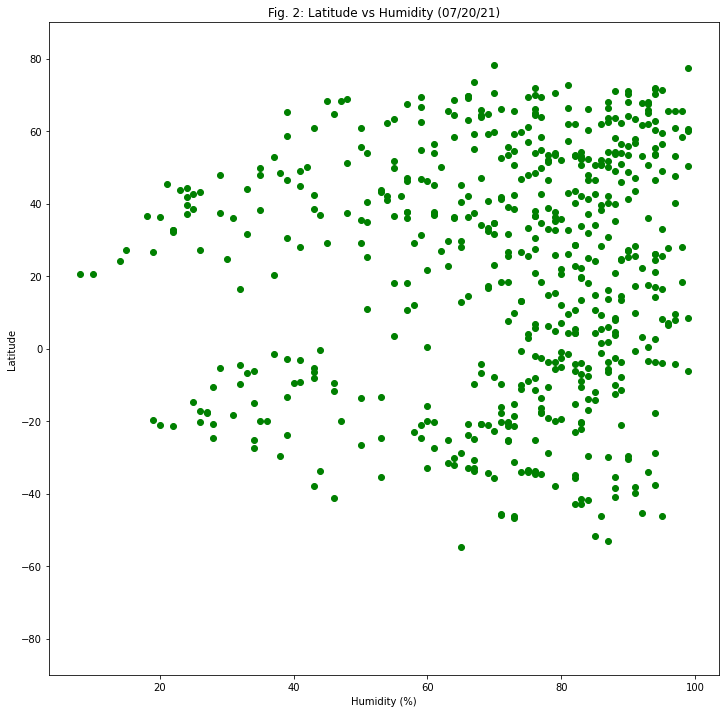

In [13]:
fig2 = plt.figure(figsize =(12, 12))

clean_city_humi = clean_city_data["Humidity %"]
clean_city_humi

clean_city_lat = clean_city_data["Latitude"]
clean_city_lat

lat_humi_scatter =  plt.scatter( clean_city_humi, clean_city_lat, color="green")

plt.ylabel("Latitude")
plt.ylim(-90,90)
plt.xlabel(u"Humidity (%)")
plt.title("Fig. 2: Latitude vs Humidity (07/20/21)")
plt.show

# Save the plotted figures as .pngs
fig2 = lat_humi_scatter.get_figure()
fig2.savefig(r'../Outputs/WeatherPy_Fig2.png')

#### Analysis: This scatter plot is a verticle slice of Planet Earth. The x ("Humidity") axis marks the amount water vapor in the air of cities around the world. Humidity is distributed across latitudes and weighted toward 70%. Cities nearest the equator (10 degrees to -10 degrees) have a less even distribution of humidity, weighted more strongly toward 70-80% humidity. Additional data reveals several outliers cities with lower humidity percents around 6-16.

Humidity outliers = [10  8 22 20 22 19 23 15 21 18 22 19 14 20 22]


<function matplotlib.pyplot.show(close=None, block=None)>

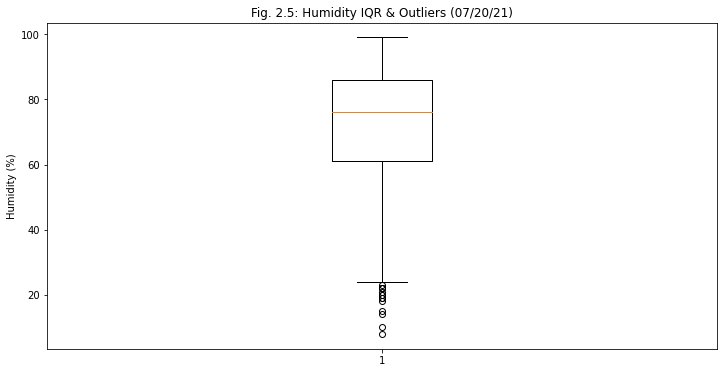

In [14]:
fig2_5 = plt.figure(figsize =(12, 6))

# Determine outliers using upper and lower bounds
quartiles = clean_city_humi.quantile([.25,.5,.75])
lowq = quartiles[.25]
upq = quartiles[.75]
inqr = upq - lowq
lower_bound = lowq - (1.5*inqr)
upper_bound = upq + (1.5*inqr)
outliers = clean_city_humi.loc[(clean_city_humi<lower_bound)|(clean_city_humi>upper_bound)]
print(f"Humidity outliers = {outliers.values}")

plt.boxplot(clean_city_humi)

plt.ylabel(u"Humidity (%)")
plt.title("Fig. 2.5: Humidity IQR & Outliers (07/20/21)")
plt.show

# Save the plotted figures as .pngs
# fig2_5.get_figure()
# fig2_5.savefig(r'../Outputs/WeatherPy_Fig2_5.png')

## Latitude vs. Cloudiness Plot

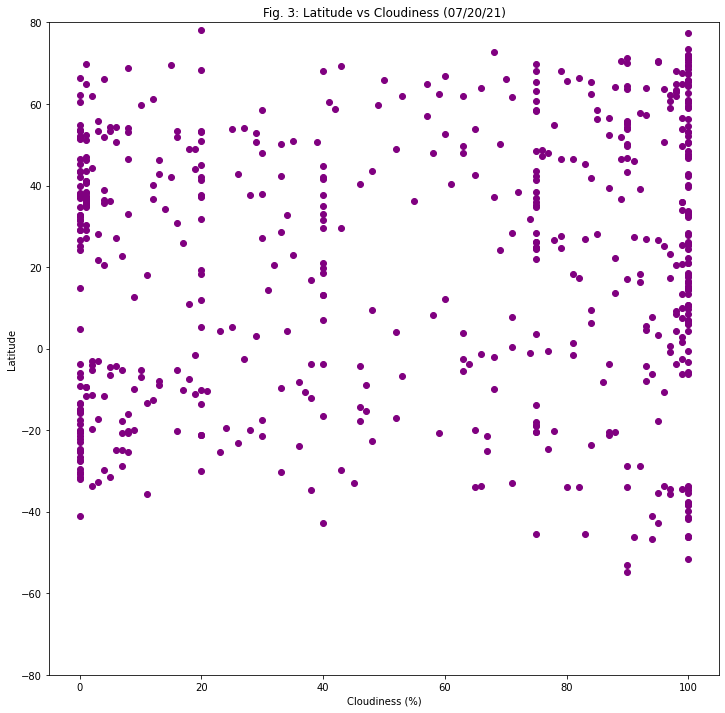

In [15]:
fig3 = plt.figure(figsize =(12, 12))

clean_city_clou = clean_city_data["Cloudiness %"]
clean_city_clou

clean_city_lat = clean_city_data["Latitude"]
clean_city_lat

lat_cloud_scatter =  plt.scatter(clean_city_clou, clean_city_lat, color="purple")

plt.ylabel("Latitude")
plt.ylim(-80,80)
plt.xlabel(u"Cloudiness (%)")
plt.title("Fig. 3: Latitude vs Cloudiness (07/20/21)")
plt.show

# Save the plotted figures as .pngs
fig3 = lat_cloud_scatter.get_figure()
fig3.savefig(r'../Outputs/WeatherPy_Fig3.png')

#### Analysis: This scatter plot is a verticle slice of Planet Earth. The x ("Cloudiness %") axis marks the fraction of the sky obscured by clouds in cities around the world. Cloudiness percent is farely evenly distributed across latitudes and weighted toward the ends at 0% and 100%. 

Cloudiness outliers = []


<function matplotlib.pyplot.show(close=None, block=None)>

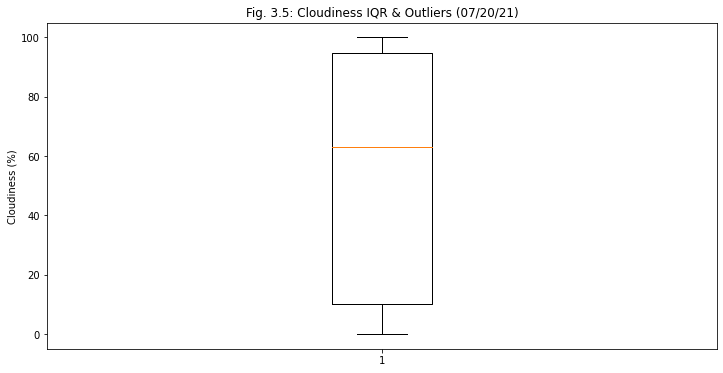

In [16]:
fig3_5 = plt.figure(figsize =(12, 6))

# Determine outliers using upper and lower bounds
quartiles = clean_city_clou.quantile([.25,.5,.75])
lowq = quartiles[.25]
upq = quartiles[.75]
inqr = upq - lowq
lower_bound = lowq - (1.5*inqr)
upper_bound = upq + (1.5*inqr)

outliers_2 = clean_city_humi.loc[(clean_city_clou<lower_bound)|(clean_city_clou>upper_bound)]
print(f"Cloudiness outliers = {outliers_2.values}")

plt.boxplot(clean_city_clou)

plt.ylabel(u"Cloudiness (%)")
plt.title("Fig. 3.5: Cloudiness IQR & Outliers (07/20/21)")
plt.show

## Latitude vs. Wind Speed Plot

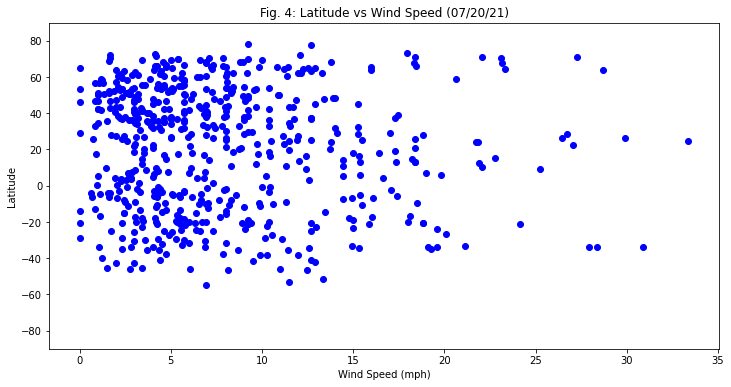

In [17]:
fig4 = plt.figure(figsize =(12, 6))

clean_city_wind = clean_city_data["Wind Speed (mph)"]
clean_city_wind

clean_city_lat = clean_city_data["Latitude"]
clean_city_lat

lat_temp_scatter =  plt.scatter(clean_city_wind, clean_city_lat, color="blue")

plt.ylabel("Latitude")
plt.ylim(-90,90)
plt.xlabel(u"Wind Speed (mph)")
plt.title("Fig. 4: Latitude vs Wind Speed (07/20/21)")
plt.show

# Save the plotted figures as .pngs
fig4 = lat_temp_scatter.get_figure()
fig4.savefig(r'../Outputs/WeatherPy_Fig4.png')

#### Analysis: This scatter plot is a verticle slice of Planet Earth. The x ("Wind Speed") axis marks the speed of wind in miles per hour in cities around the world; 20-30 mph is considered "windy". There is a weak relationship between Wind Speed and Latitude. Winds speeds are distributed evenly across latitudes with the majority of wind speeds plotted from 0-10 mph.  

## Linear Regression

In [18]:
# Separate data into Northern Hemisphere >= 0 degrees latitude and Southern Hemisphere < 0 degrees latitude)
North_Hem_data = clean_city_data.loc[clean_city_data["Latitude"]>=0]
South_Hem_data = clean_city_data.loc[clean_city_data["Latitude"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [19]:
North_Hem_data.columns

Index(['City', 'Country', 'Temperature', 'Max Temp', 'Humidity %',
       'Cloudiness %', 'Wind Speed (mph)', 'Latitude', 'Longitude'],
      dtype='object')

The correlation between max temperature and latitude is -0.66


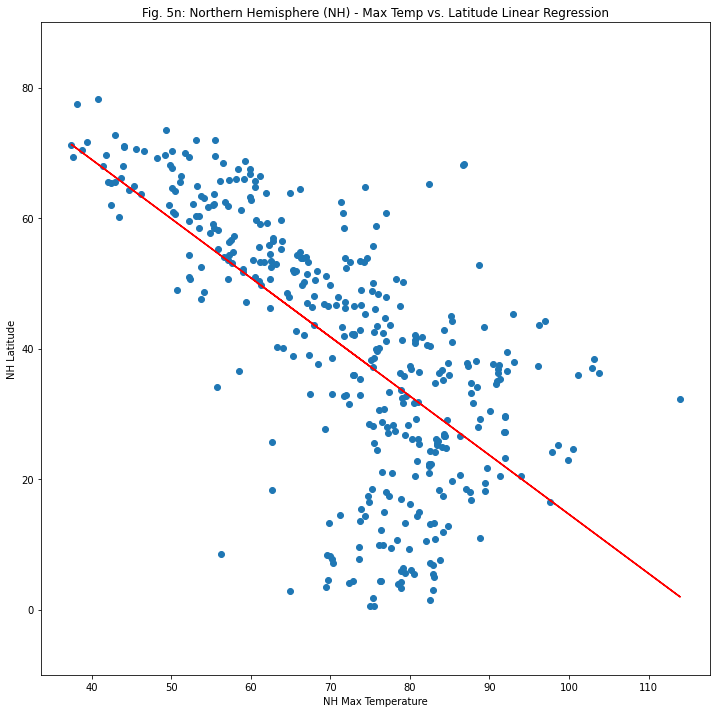

In [20]:
fig_5n = plt.figure(figsize =(12, 12))

NH_max_temp = North_Hem_data['Max Temp']
NH_max_temp

NH_lat = North_Hem_data['Latitude']
NH_lat

x_values = NH_max_temp
y_values = NH_lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="pink")
plt.xlabel("NH Max Temperature")
plt.ylabel("NH Latitude")
plt.ylim(-10,90)
plt.title("Fig. 5n: Northern Hemisphere (NH) - Max Temp vs. Latitude Linear Regression")

# Save the plotted figures as .pngs
fig5n = lat_temp_scatter.get_figure()
fig5n.savefig(r'../Outputs/WeatherPy_Fig5n.png')

# Calculate the correlation coefficient
correlation_NH_temp = st.pearsonr(NH_max_temp,NH_lat)
print(f"The correlation between max temperature and latitude is {round(correlation_NH_temp[0],2)}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between max temperature and latitude is 0.79


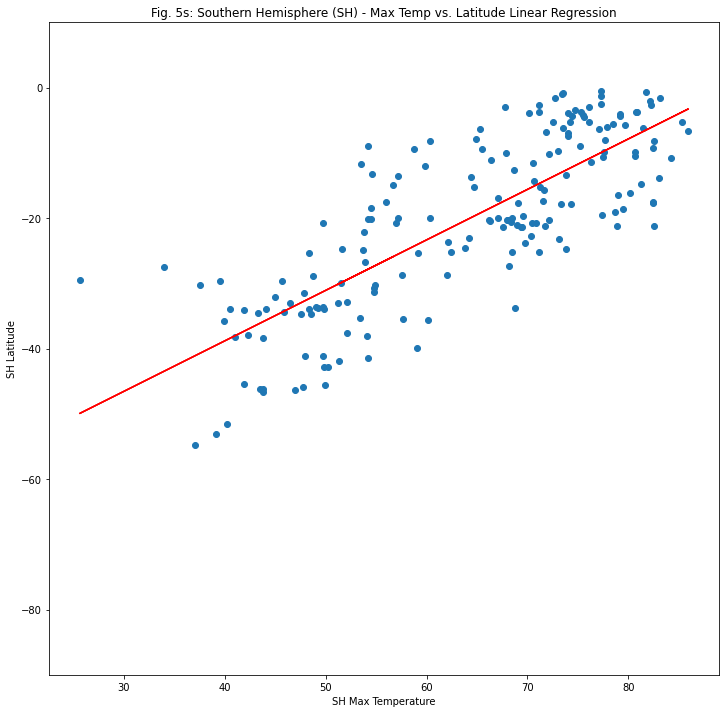

In [21]:
fig_5s = plt.figure(figsize =(12, 12))

SH_max_temp = South_Hem_data['Max Temp']
SH_max_temp

SH_lat = South_Hem_data['Latitude']
SH_lat

x_values = SH_max_temp
y_values = SH_lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="pink")
plt.xlabel("SH Max Temperature")
plt.ylabel("SH Latitude")
plt.ylim(-90,10)
plt.title("Fig. 5s: Southern Hemisphere (SH) - Max Temp vs. Latitude Linear Regression")


# Save the plotted figures as .pngs
fig5s = lat_temp_scatter.get_figure()
fig5s.savefig(r'../Outputs/WeatherPy_Fig5s.png')

# Calculate the correlation coefficient
correlation_SH_temp = st.pearsonr(SH_max_temp,SH_lat)
print(f"The correlation between max temperature and latitude is {round(correlation_SH_temp[0],2)}")

#### Analysis: Scatter plots 5n and 5s show a strong correlation between the Latitude and Max Temperature. 

#### Figure 5n shows max temperatures increase for cities placed near to the equator. 

#### Figure 5s shows max temperatures decrease for cities placed further away from the equator.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between humidity % and latitude is 0.01


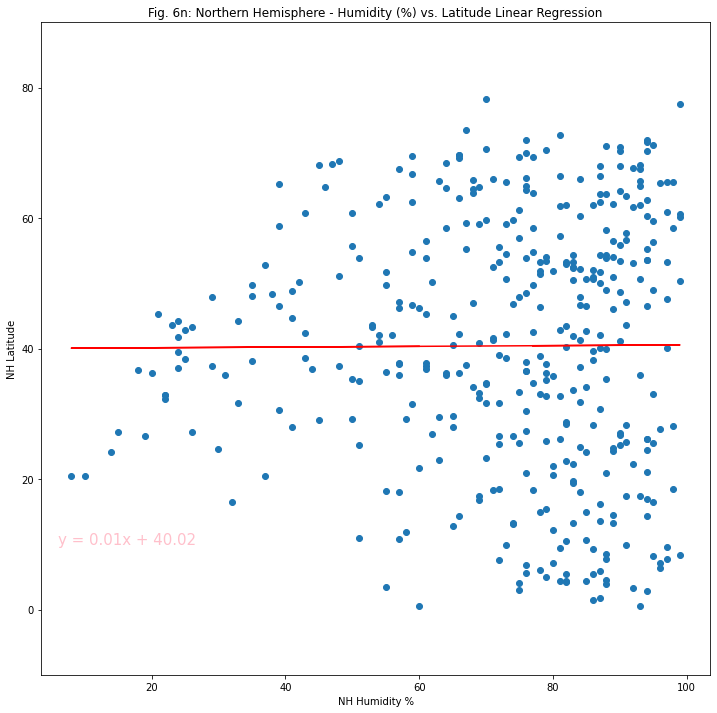

In [22]:
fig_6n = plt.figure(figsize =(12, 12))

NH_hum = North_Hem_data['Humidity %']
NH_hum

x_values = NH_hum
y_values = NH_lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="pink")
plt.xlabel("NH Humidity %")
plt.ylabel("NH Latitude")
plt.ylim(-10,90)
plt.title("Fig. 6n: Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Save the plotted figures as .pngs
fig6n = lat_temp_scatter.get_figure()
fig6n.savefig(r'../Outputs/WeatherPy_Fig6n.png')

# Calculate the correlation coefficient
correlation_NH_hum = st.pearsonr(NH_hum,NH_lat)
print(f"The correlation between humidity % and latitude is {round(correlation_NH_hum[0],2)}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between humidity % and latitude is -0.11


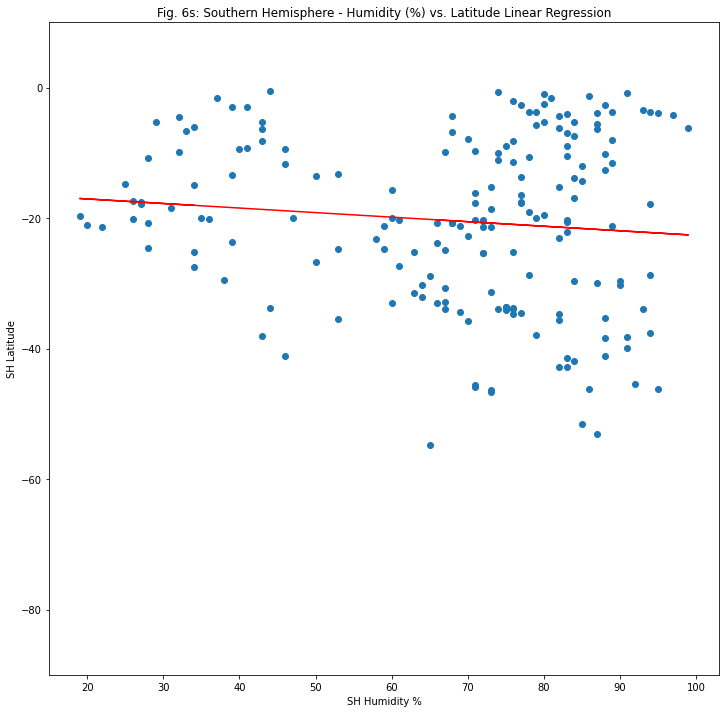

In [23]:
fig_6s = plt.figure(figsize =(12, 12))

SH_hum = South_Hem_data['Humidity %']
SH_hum

x_values = SH_hum
y_values = SH_lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="pink")
plt.xlabel("SH Humidity %")
plt.ylabel("SH Latitude")
plt.ylim(-90,10)
plt.title("Fig. 6s: Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Save the plotted figures as .pngs
fig6s = lat_temp_scatter.get_figure()
fig6s.savefig(r'../Outputs/WeatherPy_Fig6s.png')

# Calculate the correlation coefficient
correlation_SH_hum = st.pearsonr(SH_hum,SH_lat)
print(f"The correlation between humidity % and latitude is {round(correlation_SH_hum[0],2)}")

### Analysis: Scatter plots 6n and 6s show no meaningful relationship between the Latitude and Humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between cloudiness % and latitude is 0.01


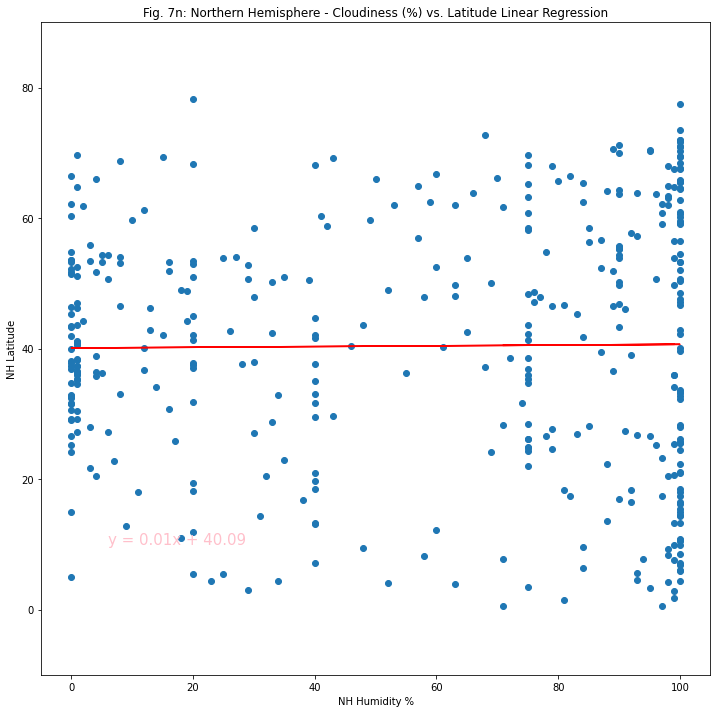

In [24]:
fig_7n = plt.figure(figsize =(12, 12))

NH_clou = North_Hem_data['Cloudiness %']
NH_clou

x_values = NH_clou
y_values = NH_lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="pink")
plt.xlabel("NH Humidity %")
plt.ylabel("NH Latitude")
plt.ylim(-10,90)
plt.title("Fig. 7n: Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Save the plotted figures as .pngs
fig7n = lat_temp_scatter.get_figure()
fig7n.savefig(r'../Outputs/WeatherPy_Fig7n.png')

# Calculate the correlation coefficient
correlation_NH_hum = st.pearsonr(NH_hum,NH_lat)
print(f"The correlation between cloudiness % and latitude is {round(correlation_NH_hum[0],2)}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between cloudiness % and latitude is -0.11


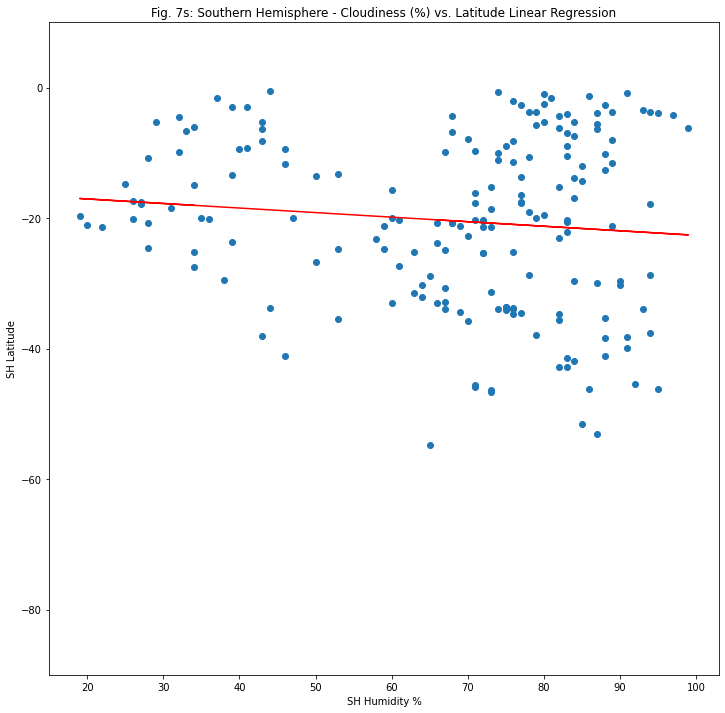

In [25]:
fig_7s = plt.figure(figsize =(12, 12))

SH_clou = South_Hem_data['Humidity %']
SH_clou

x_values = SH_clou
y_values = SH_lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="pink")
plt.xlabel("SH Humidity %")
plt.ylabel("SH Latitude")
plt.ylim(-90,10)
plt.title("Fig. 7s: Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Save the plotted figures as .pngs
fig7s = lat_temp_scatter.get_figure()
fig7s.savefig(r'../Outputs/WeatherPy_Fig7s.png')

# Calculate the correlation coefficient
correlation_SH_clou = st.pearsonr(SH_clou,SH_lat)
print(f"The correlation between cloudiness % and latitude is {round(correlation_SH_clou[0],2)}")

### Analysis: Scatter plots 7n and 7s show no meaningful relationship between the Latitude and Humidity.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between wind speed and latitude is -0.09


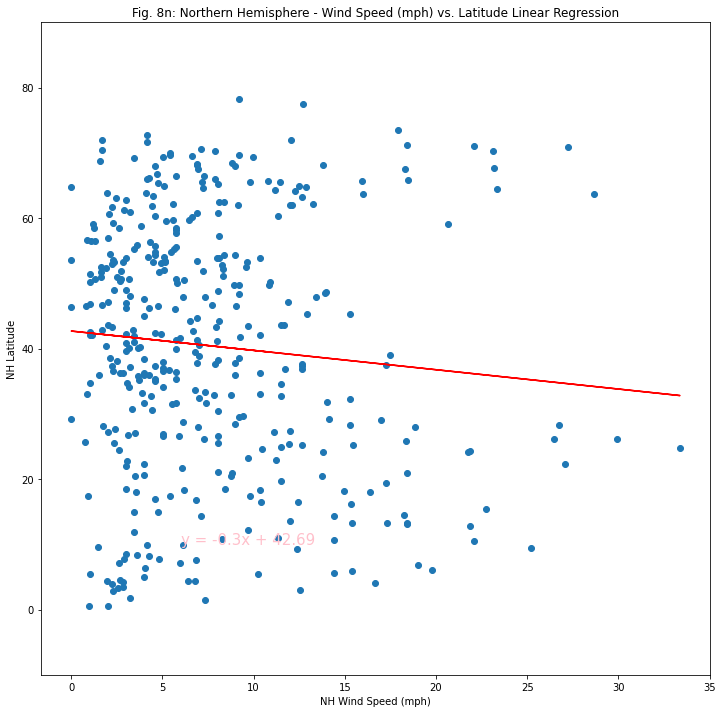

In [26]:
fig_8n = plt.figure(figsize =(12, 12))

NH_wind = North_Hem_data['Wind Speed (mph)']
NH_wind

x_values = NH_wind
y_values = NH_lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="pink")
plt.xlabel("NH Wind Speed (mph)")
plt.ylabel("NH Latitude")
plt.ylim(-10,90)
plt.title("Fig. 8n: Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Save the plotted figures as .pngs
fig8n = lat_temp_scatter.get_figure()
fig8n.savefig(r'../Outputs/WeatherPy_Fig8n.png')

# Calculate the correlation coefficient
correlation_NH_wind = st.pearsonr(NH_wind,NH_lat)
print(f"The correlation between wind speed and latitude is {round(correlation_NH_wind[0],2)}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between wind speed and latitude is -0.11


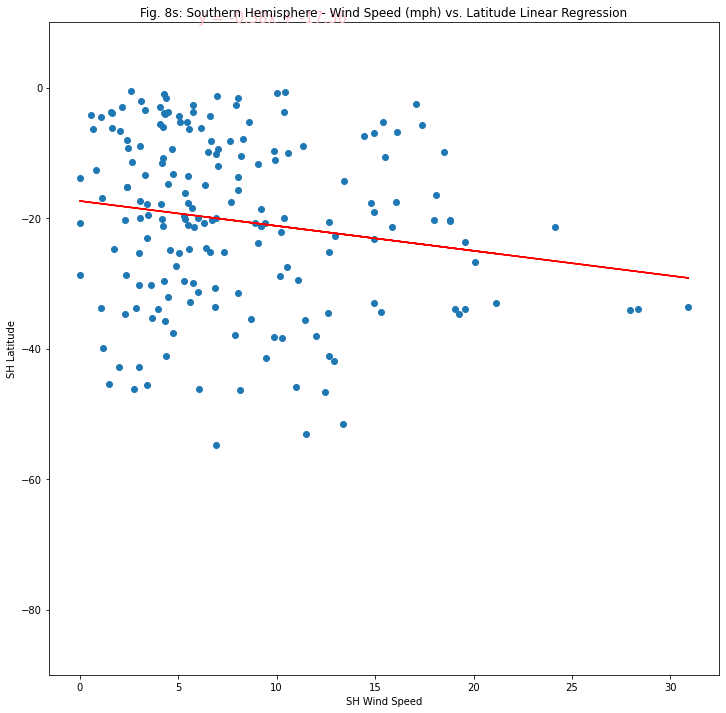

In [27]:
fig_8s = plt.figure(figsize =(12, 12))

SH_wind = South_Hem_data['Wind Speed (mph)']
SH_wind

x_values = SH_wind
y_values = SH_lat
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="pink")
plt.xlabel("SH Wind Speed")
plt.ylabel("SH Latitude")
plt.ylim(-90,10)
plt.title("Fig. 8s: Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Save the plotted figures as .pngs
fig8s = lat_temp_scatter.get_figure()
fig8s.savefig(r'../Outputs/WeatherPy_Fig8s.png')

# Calculate the correlation coefficient
correlation_SH_wind = st.pearsonr(SH_wind,SH_lat)
print(f"The correlation between wind speed and latitude is {round(correlation_SH_clou[0],2)}")

### Analysis: Scatter plots 8n and 8s show no meaningful relationship between the Latitude and Wind Speed. Wind speeds are fairly evenly distributed across latitudes.